# Лабораторная работа 4: Метод k-ближайших соседей

## Реализация без использования библиотек машинного обучения, только NumPy и Pandas

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import random

# Настройка отображения графиков
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

## 1. Загрузка и предварительная обработка данных

In [16]:
# Загрузка данных
df = pd.read_csv('data/WineDataset.csv')

print("1. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ")
print("=" * 50)

# Проверка на отсутствующие значения
print("Проверка отсутствующих значений:")
print(df.isnull().sum())
print()

# Информация о датасете
print("Информация о датасете:")
print(df.info())
print()

# Масштабирование признаков (стандартизация)
scaler = StandardScaler()
X = df.drop('Wine', axis=1)
y = df['Wine']
X_scaled = scaler.fit_transform(X)

print("Размерность данных после масштабирования:", X_scaled.shape)
print()

1. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ
Проверка отсутствующих значений:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of

## 2. Статистика и визуализация данных

In [17]:
print("2. СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 50)

# Базовая статистика
print("Статистика датасета:")
print(df.describe())
print()

2. СТАТИСТИКА И ВИЗУАЛИЗАЦИЯ ДАННЫХ
Статистика датасета:
          Alcohol  Malic Acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859 

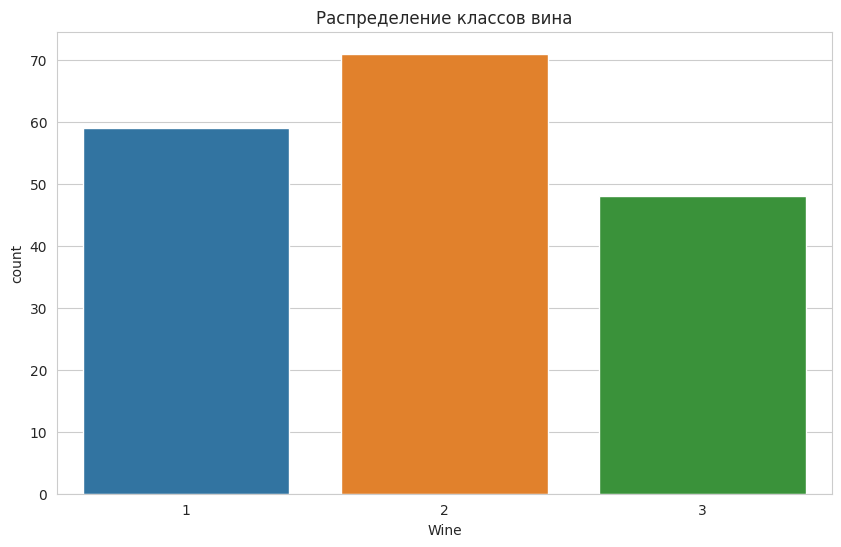

In [18]:
# Визуализация распределения классов
plt.figure(figsize=(10, 6))
sns.countplot(x='Wine', data=df)
plt.title('Распределение классов вина')
plt.show()

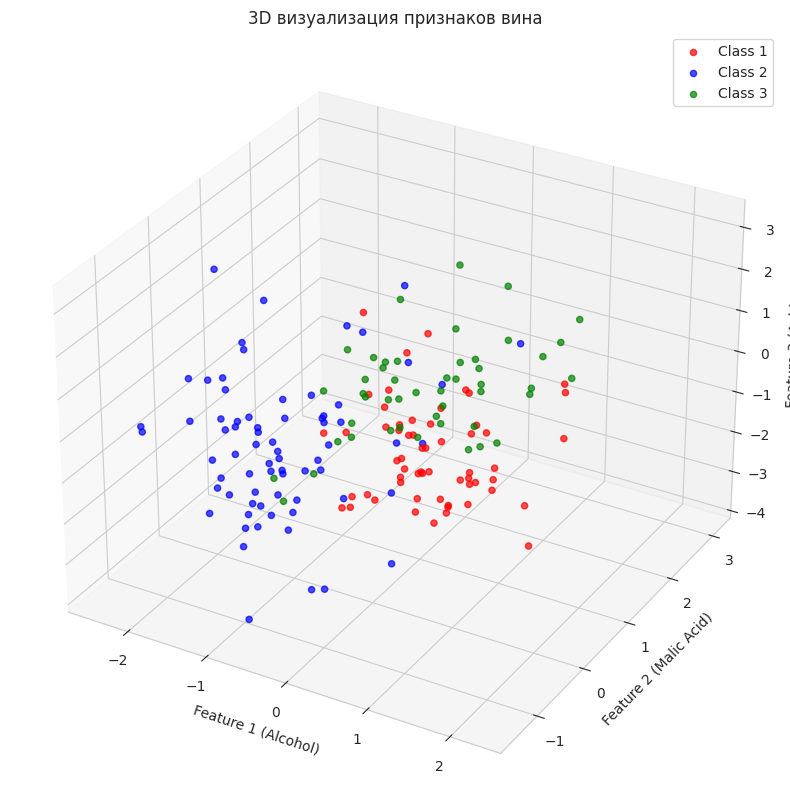

In [19]:
# 3D визуализация первых трех признаков
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']
for i in range(1, 4):
    mask = y == i
    ax.scatter(X_scaled[mask, 0], X_scaled[mask, 1], X_scaled[mask, 2], 
              c=colors[i-1], label=f'Class {i}', alpha=0.7)

ax.set_xlabel('Feature 1 (Alcohol)')
ax.set_ylabel('Feature 2 (Malic Acid)')
ax.set_zlabel('Feature 3 (Ash)')
ax.set_title('3D визуализация признаков вина')
ax.legend()
plt.show()

## 3. Реализация k-NN с нуля

In [20]:
print("3. РЕАЛИЗАЦИЯ k-NN С НУЛЯ")
print("=" * 50)

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Вычисление расстояний до всех точек обучающей выборки
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Получение k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Голосование большинством
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

print("Класс KNN успешно реализован!")

3. РЕАЛИЗАЦИЯ k-NN С НУЛЯ
Класс KNN успешно реализован!


## 4. Построение моделей с различными наборами признаков

In [21]:
print("4. ПОСТРОЕНИЕ МОДЕЛЕЙ С РАЗЛИЧНЫМИ НАБОРАМИ ПРИЗНАКОВ")
print("=" * 50)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Преобразуем в numpy arrays чтобы избежать проблем с индексами
y_train = y_train.values
y_test = y_test.values

# Модель 1: Случайный выбор признаков
print("МОДЕЛЬ 1: СЛУЧАЙНЫЙ ВЫБОР ПРИЗНАКОВ")
print("-" * 40)

# Выбор 5 случайных признаков
np.random.seed(42)
random_features = np.random.choice(X_scaled.shape[1], size=5, replace=False)
print(f"Случайно выбранные признаки: {random_features}")

X_train_random = X_train[:, random_features]
X_test_random = X_test[:, random_features]

# Модель 2: Фиксированный набор признаков
print("\nМОДЕЛЬ 2: ФИКСИРОВАННЫЙ НАБОР ПРИЗНАКОВ")
print("-" * 40)

# Выбор фиксированных признаков (первые 5)
fixed_features = [0, 1, 2, 3, 4]  # Alcohol, Malic Acid, Ash, Alcalinity of ash, Magnesium
print(f"Фиксированные признаки: {fixed_features}")

X_train_fixed = X_train[:, fixed_features]
X_test_fixed = X_test[:, fixed_features]

4. ПОСТРОЕНИЕ МОДЕЛЕЙ С РАЗЛИЧНЫМИ НАБОРАМИ ПРИЗНАКОВ
МОДЕЛЬ 1: СЛУЧАЙНЫЙ ВЫБОР ПРИЗНАКОВ
----------------------------------------
Случайно выбранные признаки: [11  9  0  8  5]

МОДЕЛЬ 2: ФИКСИРОВАННЫЙ НАБОР ПРИЗНАКОВ
----------------------------------------
Фиксированные признаки: [0, 1, 2, 3, 4]


## 5. Оценка моделей при различных значениях k

5. ОЦЕНКА МОДЕЛЕЙ ПРИ РАЗЛИЧНЫХ ЗНАЧЕНИЯХ k

Модель 1: Случайные признаки
------------------------------
k = 3, Точность: 0.9259


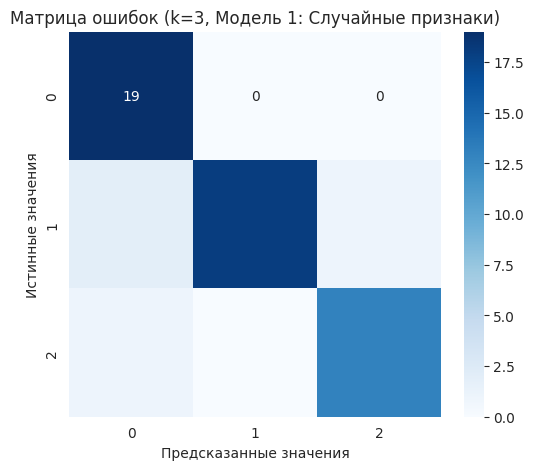

k = 5, Точность: 0.9259


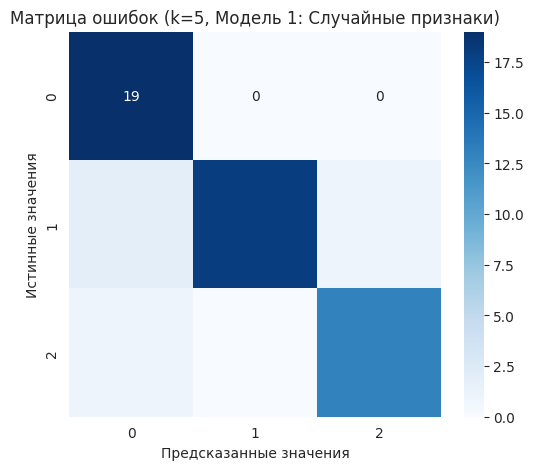

k = 10, Точность: 0.9259


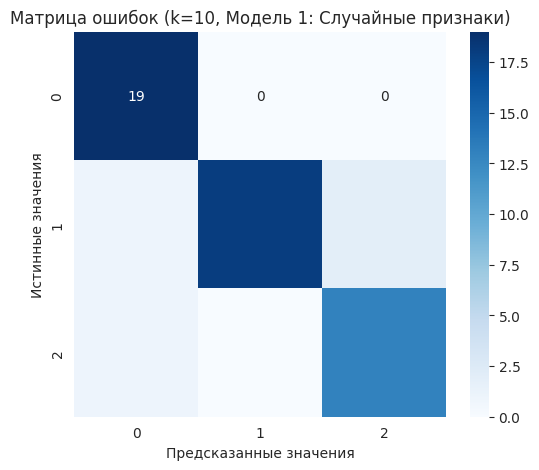

k = 15, Точность: 0.9074


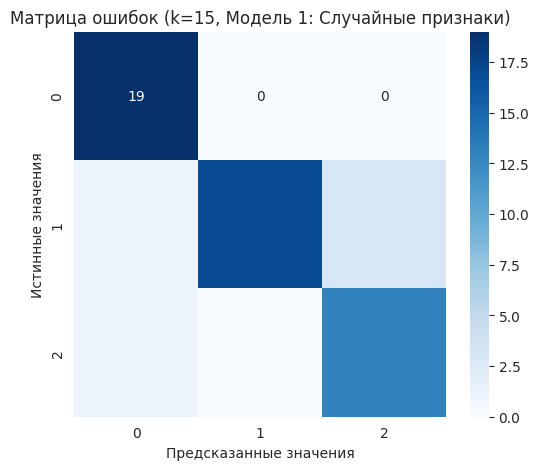


Модель 2: Фиксированные признаки
------------------------------
k = 3, Точность: 0.8889


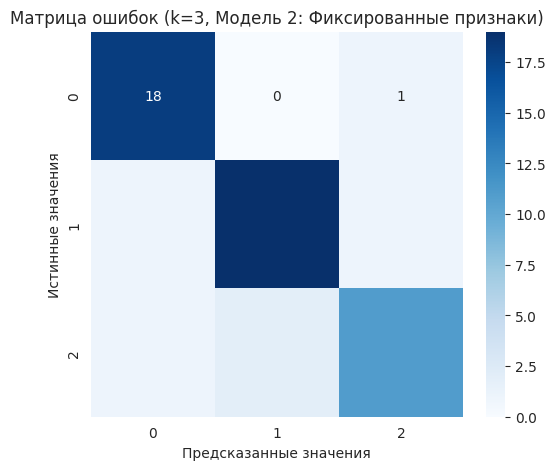

k = 5, Точность: 0.8704


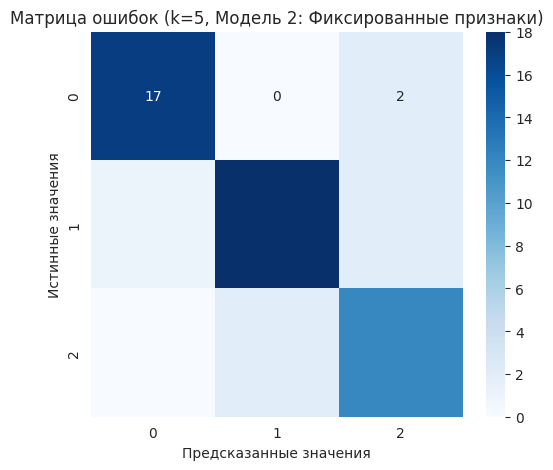

k = 10, Точность: 0.8889


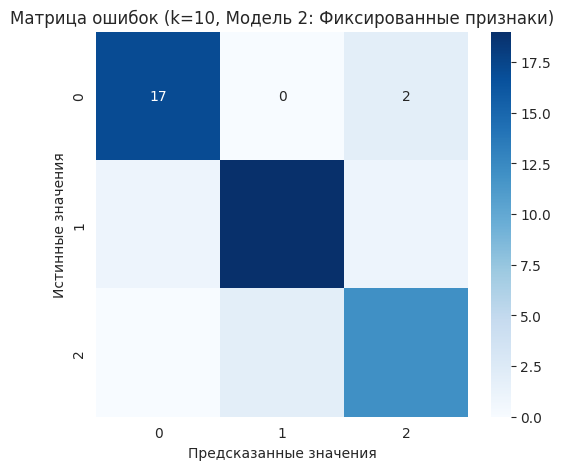

k = 15, Точность: 0.8889


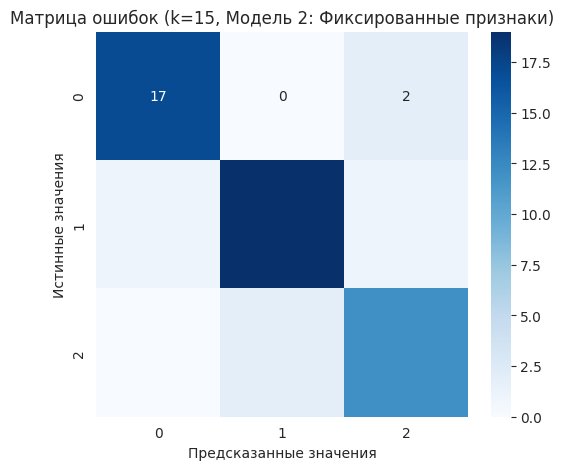

In [22]:
print("5. ОЦЕНКА МОДЕЛЕЙ ПРИ РАЗЛИЧНЫХ ЗНАЧЕНИЯХ k")
print("=" * 50)

k_values = [3, 5, 10, 15]

def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    print(f"\n{model_name}")
    print("-" * 30)
    
    results = {}
    
    for k in k_values:
        # Создание и обучение модели
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        
        # Предсказание
        y_pred = knn.predict(X_test)
        
        # Вычисление точности
        accuracy = knn.accuracy(y_test, y_pred)
        results[k] = accuracy
        
        print(f"k = {k}, Точность: {accuracy:.4f}")
        
        # Матрица ошибок
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Матрица ошибок (k={k}, {model_name})')
        plt.ylabel('Истинные значения')
        plt.xlabel('Предсказанные значения')
        plt.show()
    
    return results

# Оценка моделей
results_random = evaluate_model(X_train_random, X_test_random, y_train, y_test, "Модель 1: Случайные признаки")
results_fixed = evaluate_model(X_train_fixed, X_test_fixed, y_train, y_test, "Модель 2: Фиксированные признаки")

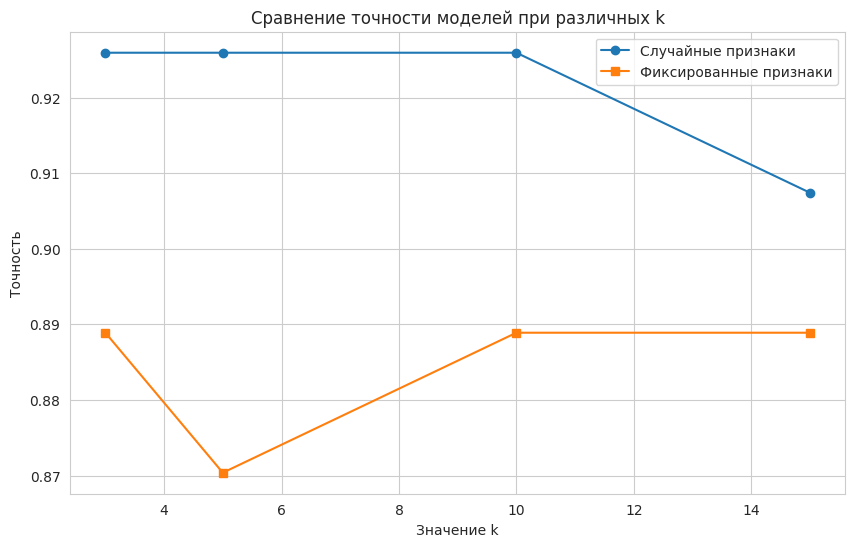

In [23]:
# Сравнение результатов
plt.figure(figsize=(10, 6))
plt.plot(k_values, [results_random[k] for k in k_values], 'o-', label='Случайные признаки')
plt.plot(k_values, [results_fixed[k] for k in k_values], 's-', label='Фиксированные признаки')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Сравнение точности моделей при различных k')
plt.legend()
plt.grid(True)
plt.show()

## 6. Выводы

In [25]:
print("\n6. ВЫВОДЫ")
print("=" * 50)
print("\nЛучшая точность достигнута при:")
best_k_random = max(results_random, key=results_random.get)
best_k_fixed = max(results_fixed, key=results_fixed.get)
print(f"- Модель 1 (случайные признаки): k={best_k_random}, точность={results_random[best_k_random]:.4f}")
print(f"- Модель 2 (фиксированные признаки): k={best_k_fixed}, точность={results_fixed[best_k_fixed]:.4f}")


6. ВЫВОДЫ

Лучшая точность достигнута при:
- Модель 1 (случайные признаки): k=3, точность=0.9259
- Модель 2 (фиксированные признаки): k=3, точность=0.8889
